In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data =pd.read_csv('/content/Mall_Customers.csv')

In [29]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


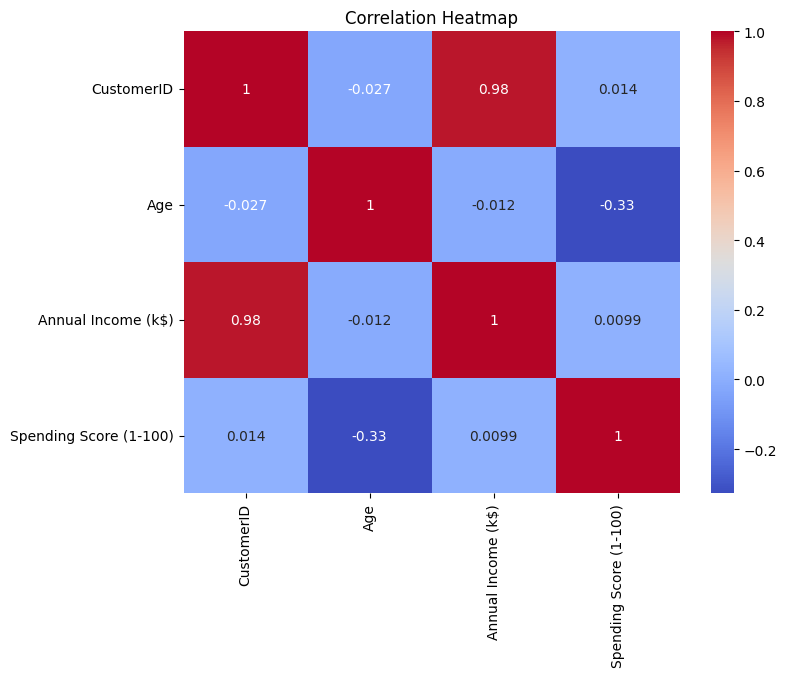

In [32]:
corr_matrix =data.select_dtypes(include="int64").corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
data =data[['Spending Score (1-100)','Annual Income (k$)']]
data.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = data[['Spending Score (1-100)','Annual Income (k$)']].values

scaler =StandardScaler()
X_scaled =scaler.fit_transform(X)

# X_scaled

In [40]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


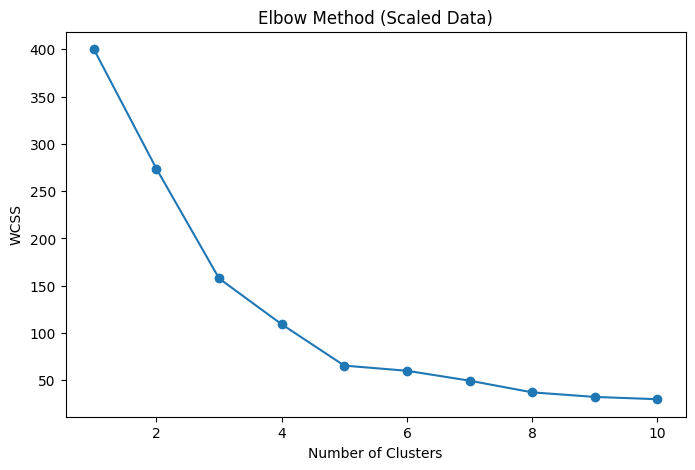

In [41]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method (Scaled Data)')
plt.show()

In [49]:
n_cluster =5

kmeans =KMeans(n_clusters=n_cluster , init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

data['Cluster'] = y_kmeans


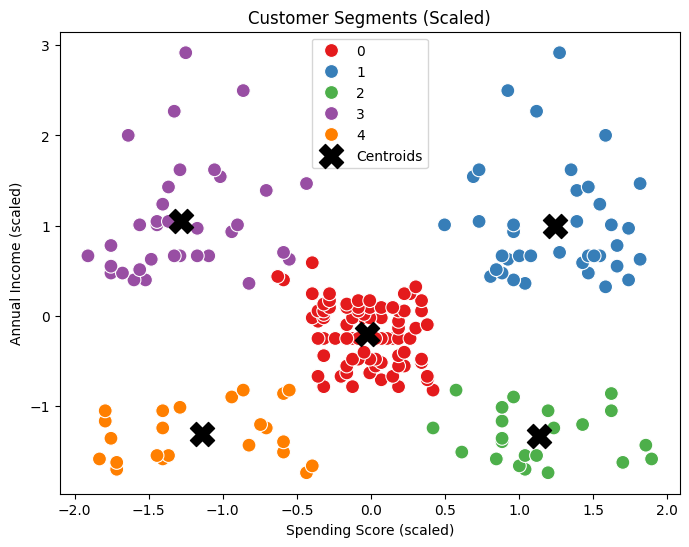

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_kmeans, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='black', label='Centroids', marker='X')
plt.xlabel('Spending Score (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.title('Customer Segments (Scaled)')
plt.legend()
plt.show()